# ЛР 1
## Задания:
1. Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).
2. Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

## Описание датасета:
Датасет удовлетворённости пассажиров их полётом на самолёте.
### Данные:
* id - id пассажира
* <b>Satisfaction_v2 (целевой столбец) - удовлетворённость полётом (satisfied/neutral or dissatisfaction)</b>
* Gender - пол пассажира
* Customer Type - лояльность пассажира (Loyal customer, disloyal customer)
* Age - возраст пассажира на момент полёта
* Type of Travel - цель полёта (Personal Travel/Business Travel)
* Class - класс полёта (Business, Eco, Eco Plus)
* Flight distance - дальность полёта
* Seat comfort - удовлетворённость удобством сидения (0-5)
* Departure/Arrival time convenient - удовлетворённость удобством времени отправления/прибытия (0-5)
* Food and drink - удовлетворённсть едой и напитками (0-5)
* Gate location - удовлетворённость удобством размещения гейтов (0-5)
* Inflight wifi service - наличие и качество WiFi на борту (0 - WiFi отсутствует, 1-5)
* Inflight entertainment - удовлетворённость развлечениям в полёте (0-5)
* Online support - удовлетворённость онлайн поддержкой (0-5)
* Ease of Online booking - удовлетворённость простотой бронирования билетов онлайн (0-5)
* On-board service - удовлетворённость обслуживанием в полёте (0-5)
* Leg room service - удовлетворённость расстоянием между ногами и сидением (0-5)
* Baggage handling - удовлетворённость работы с багажом (0-5)
* Checkin service - удовлетворённость обслуживанием при регистрации (0-5)
* Cleanliness - удовлетворённость чистотой на борту (0-5)
* Online boarding - удовлетворённость простотой получения онлайн талона на посадку (0-5)
* Departure Delay in Minutes - задержка отправления рейса
* Arrival Delay in Minutes - задержка прибытия рейса





    

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('satisfaction.xlsx', index_col=0)  

In [3]:
df

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0


Замена текстовых категориальных признаков на числовые

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['satisfaction_v2'] = labelencoder.fit_transform(df['satisfaction_v2'])
df['Gender'] =  labelencoder.fit_transform(df['Gender'])
df['Customer Type'] =  labelencoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = labelencoder.fit_transform(df['Type of Travel'])
df['Class'] =  labelencoder.fit_transform(df['Class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 11112 to 84566
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  int32  
 1   Gender                             129880 non-null  int32  
 2   Customer Type                      129880 non-null  int32  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int32  
 5   Class                              129880 non-null  int32  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              129880

Замена отсутствующих значений задержки прибытия нулями

In [5]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 11112 to 84566
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  int32  
 1   Gender                             129880 non-null  int32  
 2   Customer Type                      129880 non-null  int32  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int32  
 5   Class                              129880 non-null  int32  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              129880

Разбиение на train/test и обучение модели с разными параметрами

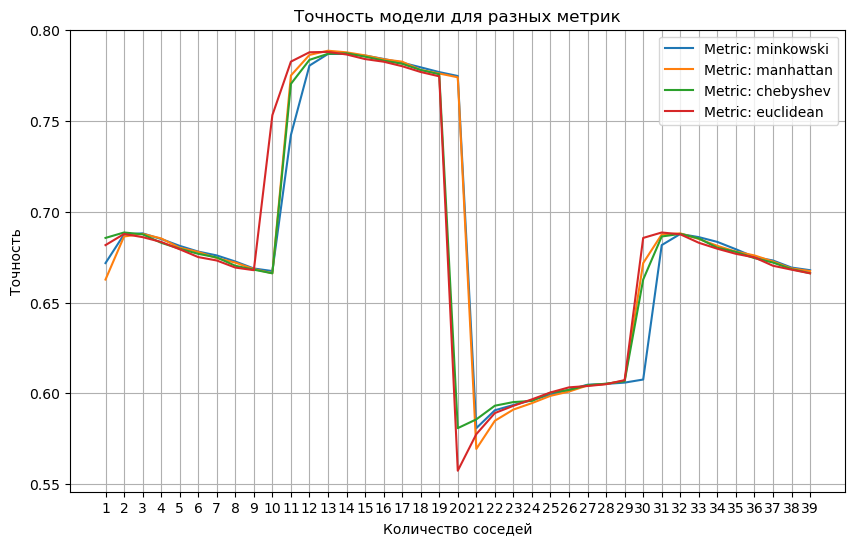

Лучшее кол-во соседей: 11, Лучшая метрика: manhattan


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


X = df.drop(columns=['satisfaction_v2'])
Y = df['satisfaction_v2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)


under_sampler = RandomUnderSampler(random_state=27)
X_resampled, Y_resampled = under_sampler.fit_resample(X_train, Y_train)


knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 40),
              'metric': ['minkowski', 'manhattan', 'chebyshev', 'euclidean']}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_resampled, Y_resampled)

best_params = grid_search.best_params_
best_metric = best_params['metric']
best_k = best_params['n_neighbors']

accuracies = grid_search.cv_results_['mean_test_score']
accuracies = np.array(accuracies).reshape(len(param_grid['n_neighbors']), len(param_grid['metric']))

plt.figure(figsize=(10, 6))

for i, metric in enumerate(param_grid['metric']):
    plt.plot(param_grid['n_neighbors'], accuracies[:, i], markersize=4,
             label=f'Metric: {metric}')

plt.title('Точность модели для разных метрик')
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.xticks(range(1, 40))
plt.legend()
plt.grid(True)
plt.show()

print(f"Лучшее кол-во соседей: {best_k}, Лучшая метрика: {best_metric}")

Оценка точности и отчёт о классификации

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_resampled, Y_resampled)

Y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Точность модели: {accuracy}")

report = classification_report(Y_test, Y_pred, zero_division=1)
print(report)

Точность модели: 0.7896263217328816
              precision    recall  f1-score   support

           0       0.75      0.80      0.78     17571
           1       0.83      0.78      0.80     21393

    accuracy                           0.79     38964
   macro avg       0.79      0.79      0.79     38964
weighted avg       0.79      0.79      0.79     38964

